# Breast Cancer Diagnosis using K-NN with different distances and feature extraction/selection.


The dataset is acquired from a kaggle contributor. The below model is to achieve highest prediction rates which would help avoid/ indentify Breast Cancer in the early stages. 


In [3]:
# importing the libraries required for the dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
#Loading the data using pandas read_csv function.

df = pd.read_csv('/Users/mahatisuvvari/Desktop/Projects/cancer_dataset.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
list(df.columns.values)

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'Unnamed: 32']

In [8]:
features = df.drop(['diagnosis','Unnamed: 32', 'id'], axis = 1, inplace = False)

In [22]:
# Scaling the data to be better understanding on the data

from sklearn.preprocessing import StandardScaler

scale_features = StandardScaler().fit(features)
scaled_dataframe = pd.DataFrame(scale_features.transform(features))

In [23]:
scaled_dataframe.index = df.index
scaled_dataframe.columns = features.columns
scaled_dataframe['diagnosis'] = df['diagnosis']

scaled_dataframe.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,M
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,M
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,M
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,M
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,M


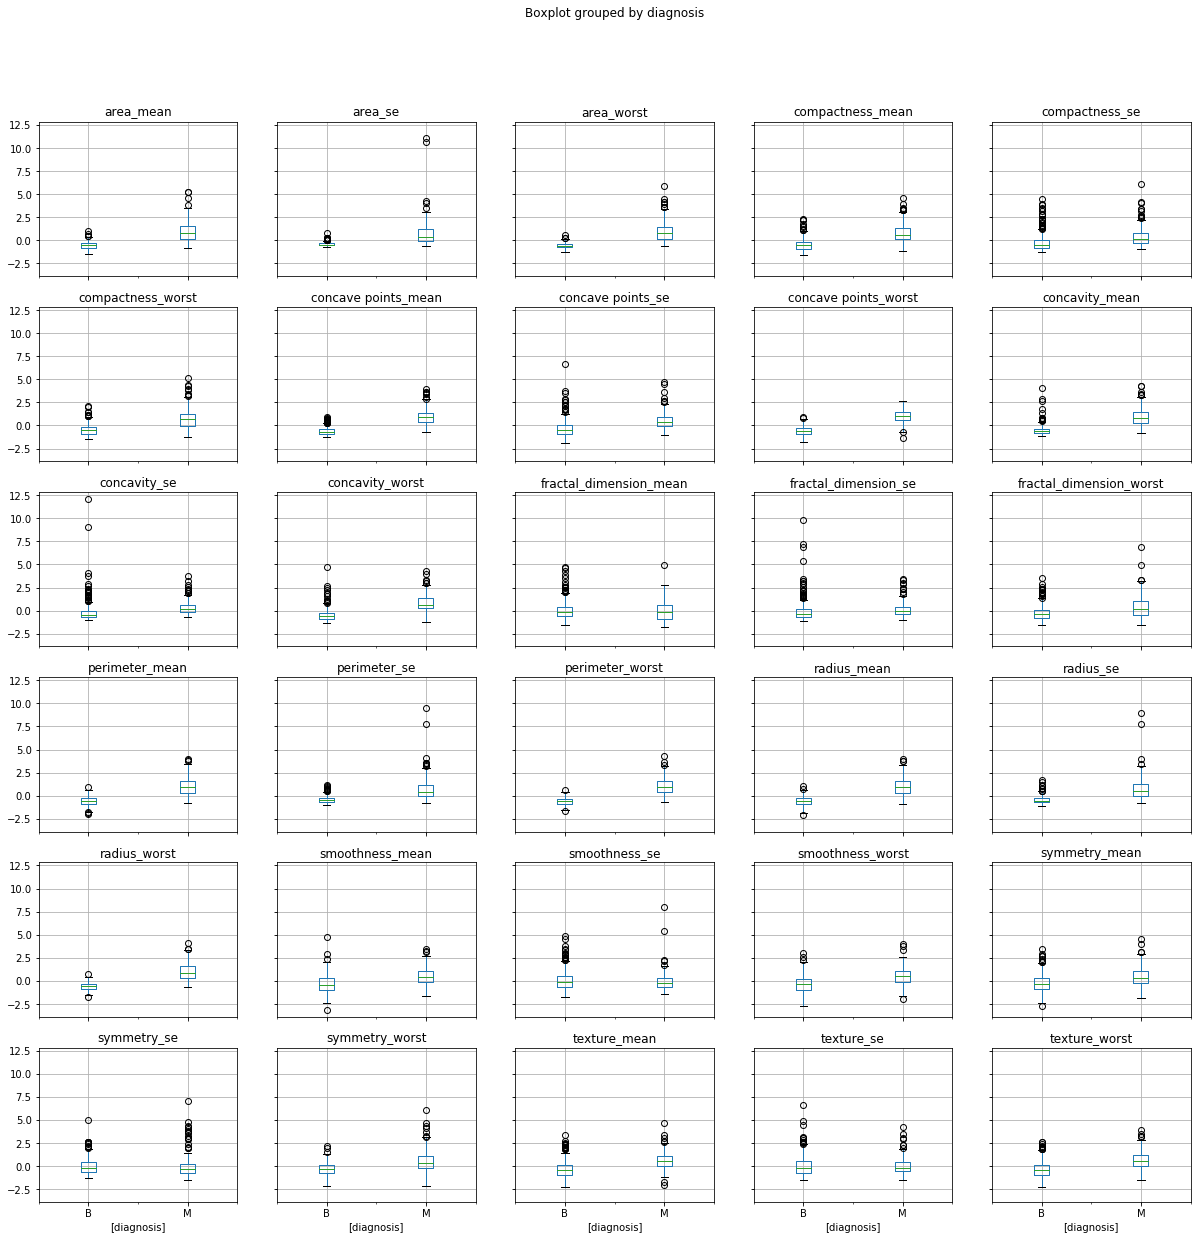

In [24]:
#The box plot will give more insights on the important features that would contribute to predicting if it is benign or malignant. 

scaled_dataframe.boxplot(by = 'diagnosis', figsize = (20,20))
plt.show()

Splitting the data into training and testing data using scikit learn.

In [12]:
from sklearn.model_selection import train_test_split

labels = df.diagnosis

X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size = 0.7)

/Users/mahatisuvvari/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [13]:
from sklearn.neighbors import KNeighborsClassifier as KNN

knn= KNN(n_neighbors = 3)
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [14]:
knn.score(X_test, y_test)

0.9590643274853801

Visualizing the features using different plots for feature selection using random forests.

In [15]:
features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
import seaborn as sns


Number of Benign cases :  357
Number of Malignant cases: 212


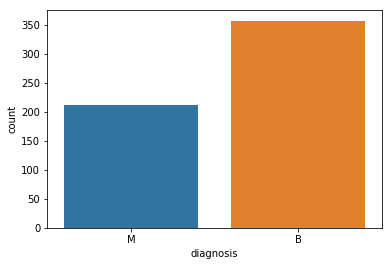

In [20]:
ax = sns.countplot(labels, label= 'Count')
B, M = labels.value_counts()
print("Number of Benign cases : ", B)
print("Number of Malignant cases:", M)

To know more about the features, we will have to check the mean, std. deviation of the features and check if they are related. Using the describe function to know more about the features.

In [21]:
features.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Plotting violin and swarm plots to examine data in more detail. 


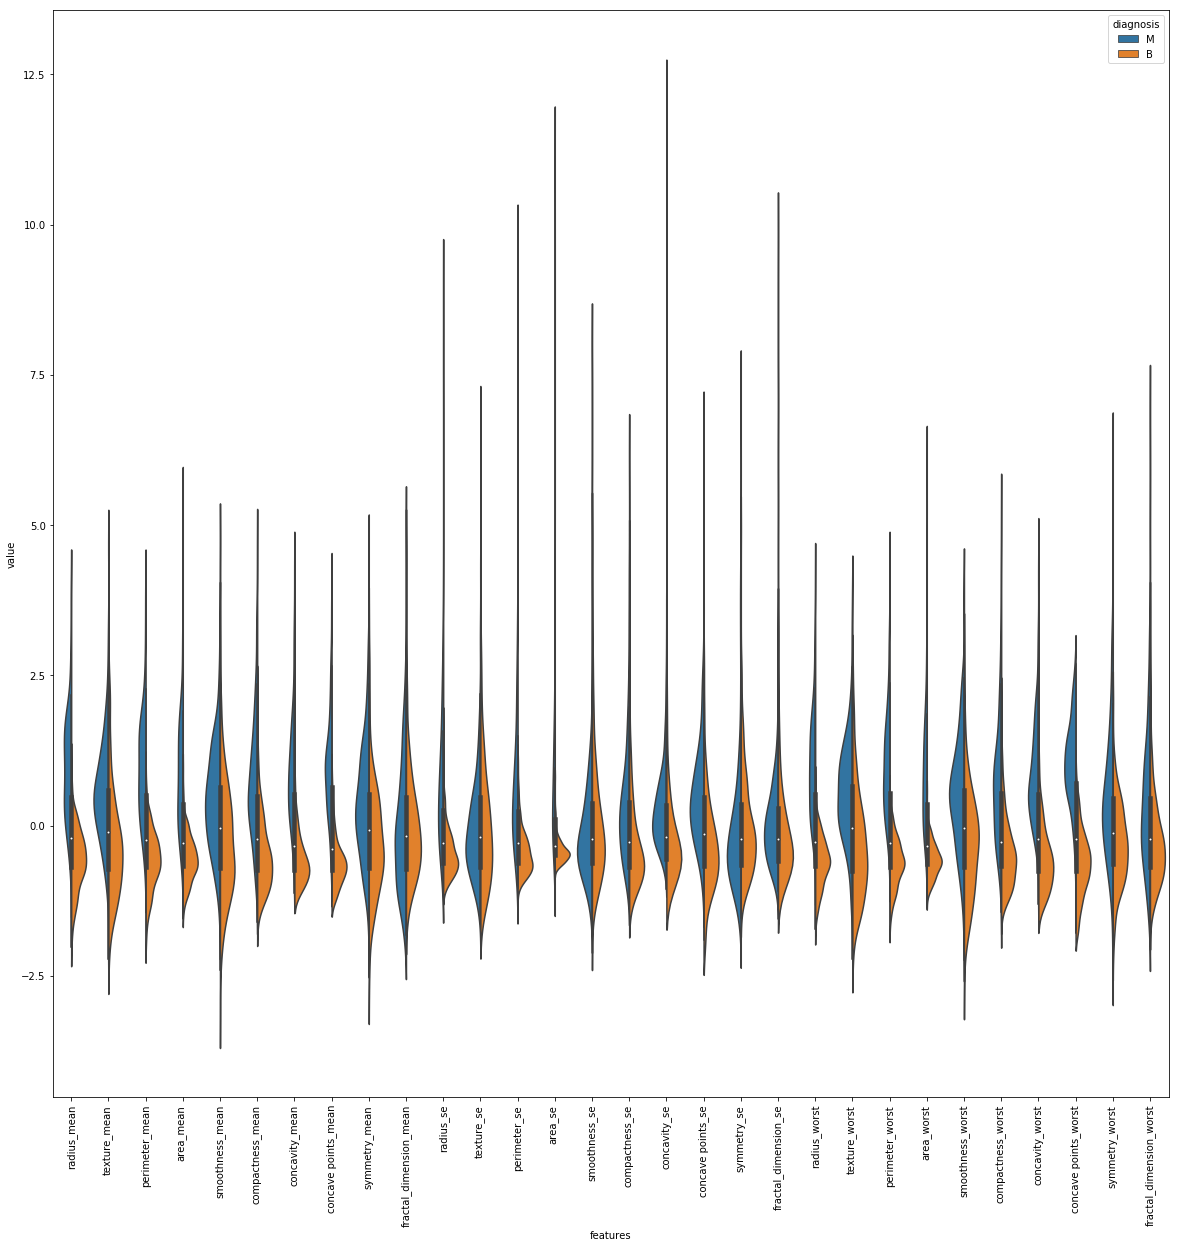

In [43]:
x = scaled_dataframe
y = labels
violin = pd.concat([y, x], axis=1)
violin = pd.melt(x, id_vars='diagnosis', var_name= 'features', value_name = 'value') 
plt.figure(figsize=(20,20))
sns.violinplot(x='features', y='value', hue = 'diagnosis', data = violin, split = True)
plt.xticks(rotation = 90)
plt.show()

From the above figure, concavity_worst and concave points_worst look very similar. We can dig deeper into these features if they are correlated. 

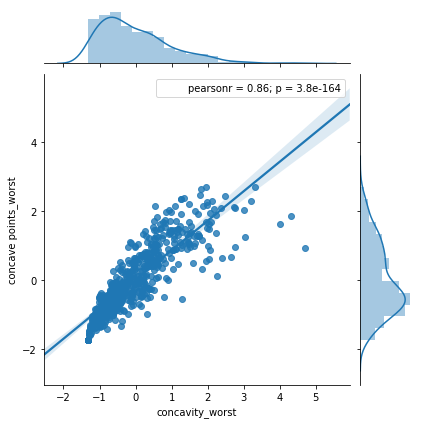

In [38]:
sns.jointplot(x.loc[:,'concavity_worst'], x.loc[:,'concave points_worst'], kind="regg")

The pearson coefficient is 0.86 which says they are very highly correlated. 

Getting more insight into the data using a swarm plot in the next phase of feature selection.

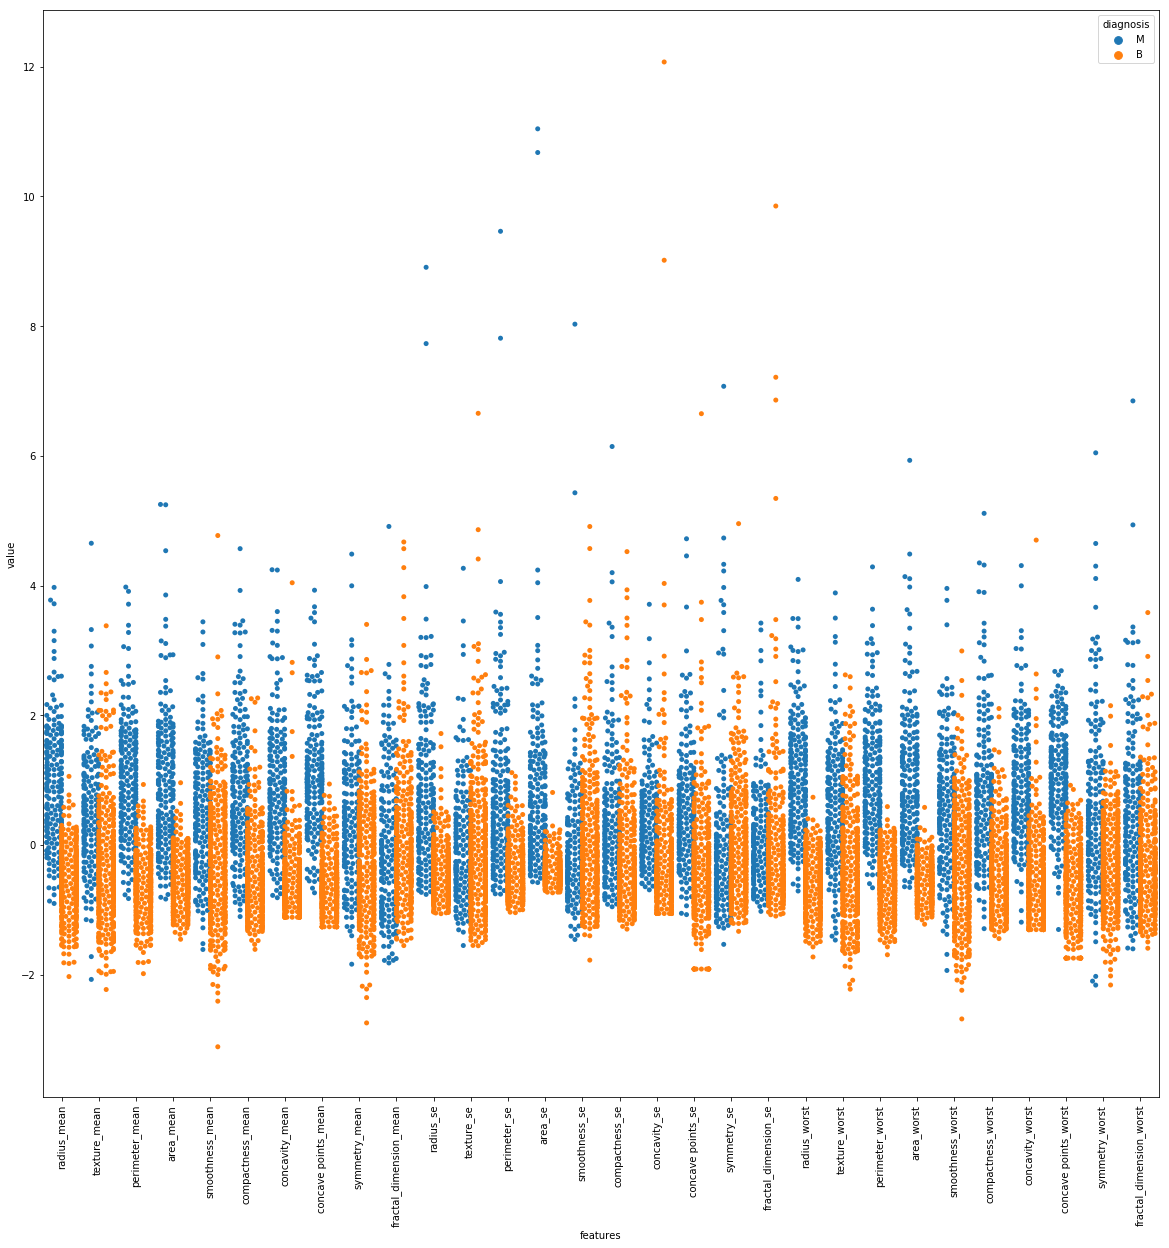

In [42]:
swarm = violin
plt.figure(figsize=(20,20))
sns.swarmplot(x='features', y='value', hue = 'diagnosis', data = swarm, dodge = True)
plt.xticks(rotation = 90,)
plt.show()

From the above plot, radius_worst, perimeter_worst and area_worst seem to be correlated. checking the correlation seperately.

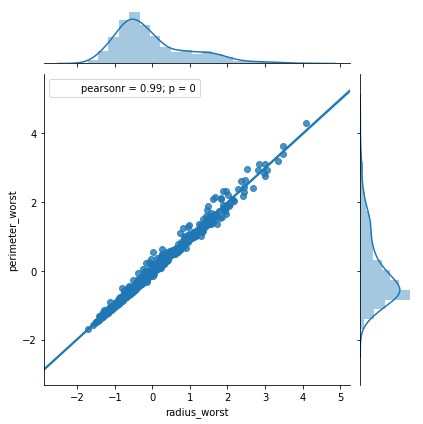

In [46]:
sns.jointplot(x.loc[:,'radius_worst'], x.loc[:,'perimeter_worst'], kind="regg")

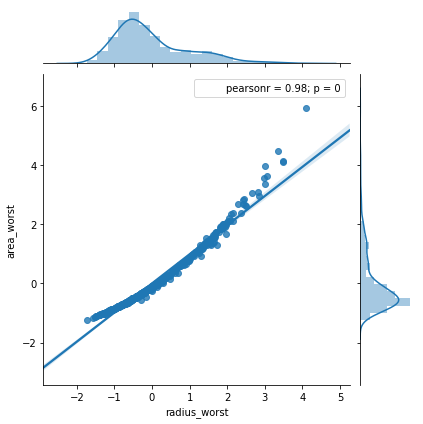

In [47]:
sns.jointplot(x.loc[:,'radius_worst'], x.loc[:,'area_worst'], kind="regg")

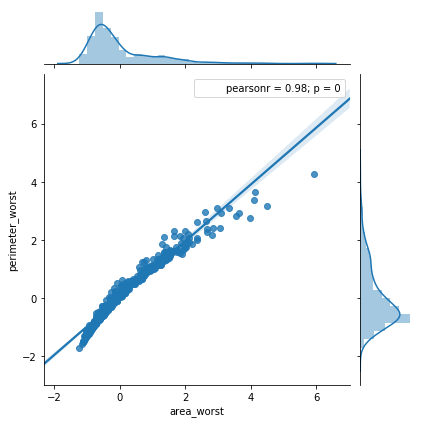

In [48]:
sns.jointplot(x.loc[:,'area_worst'], x.loc[:,'perimeter_worst'], kind="regg")

From the above plots, it looks like the above three features are very closely correlated. 

Plotting the correlation matrix to get more insights on the features. 

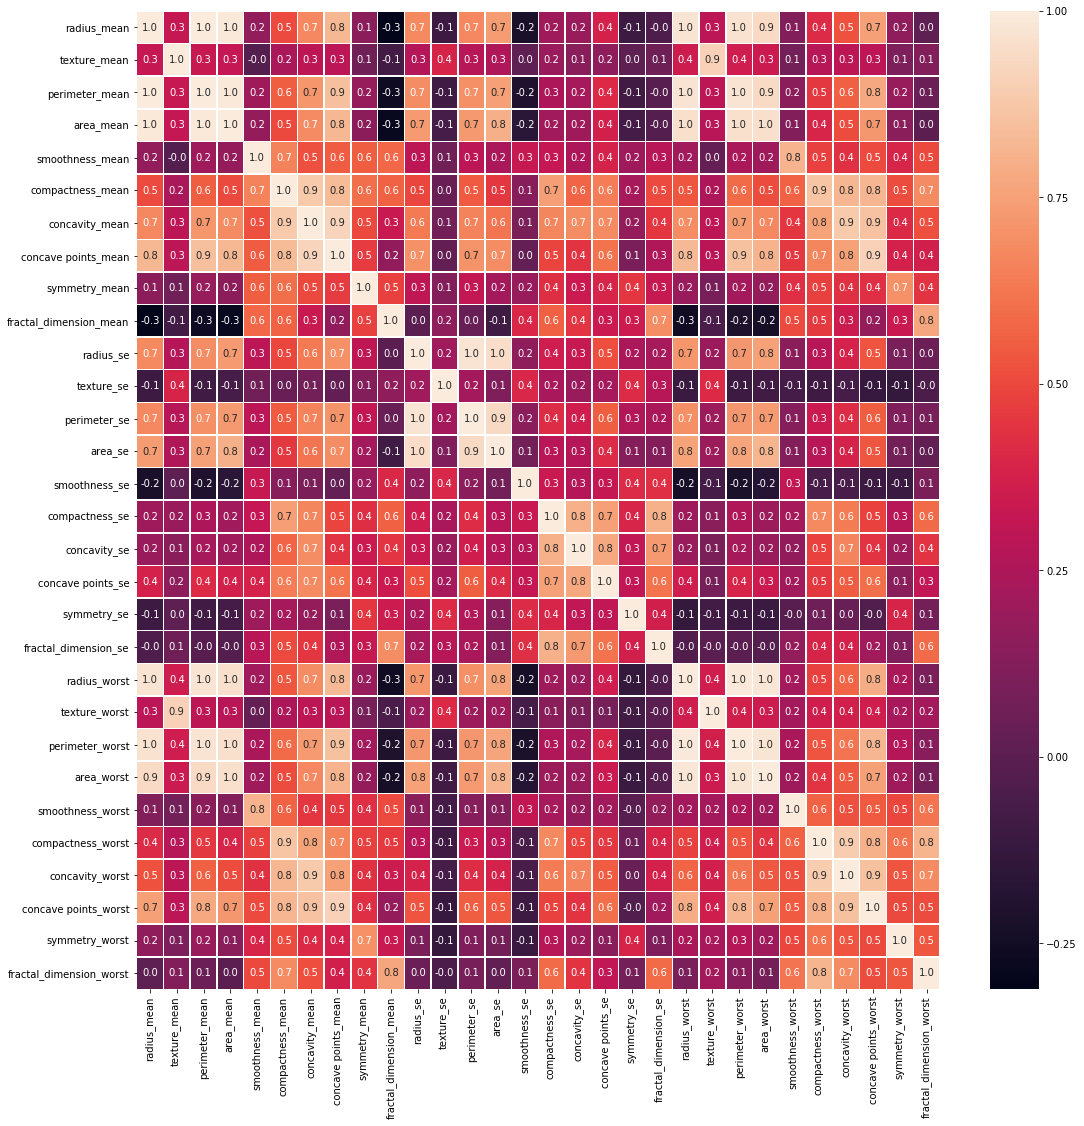

In [49]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

From the above plot, we can draw a lot of correlations with the data. We will have to narrow down the features we are using based on their correlations. The features I have picked are below.

From the below
- Compactness_mean
- concavity_mean
- concave points_mean

which are corelated, I picked 

- concavity_mean. 

From the below
- radius_se
- perimeter_se 
- area_se

are correlated. I picked

- area_se. 

From the below
- radius_worst
- perimeter_worst
- area_worst

which are correlated, I picked

- area_worst. 

From the below
- Compactness_worst
- concavity_worst 
- concave points_worst 

which are correlated. I picked

- concavity_worst. 

From the below
- Compactness_se
- concavity_se 
- concave points_se 

are correlated. I picked

- concavity_se

From the below
- texture_mean
- texture_worst 

are correlated. I picked

- texture_mean. 

From the below
- area_worst
- area_mean 

are correlated, I picked 

- area_mean.

In [55]:
# Creating a list to drop all the features which we will nt be using as mentioned above.

list = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se',
        'radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se',
        'concave points_se','texture_worst','area_worst']

features_reduced = features.drop(list, axis=1)
features_reduced.head()




,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


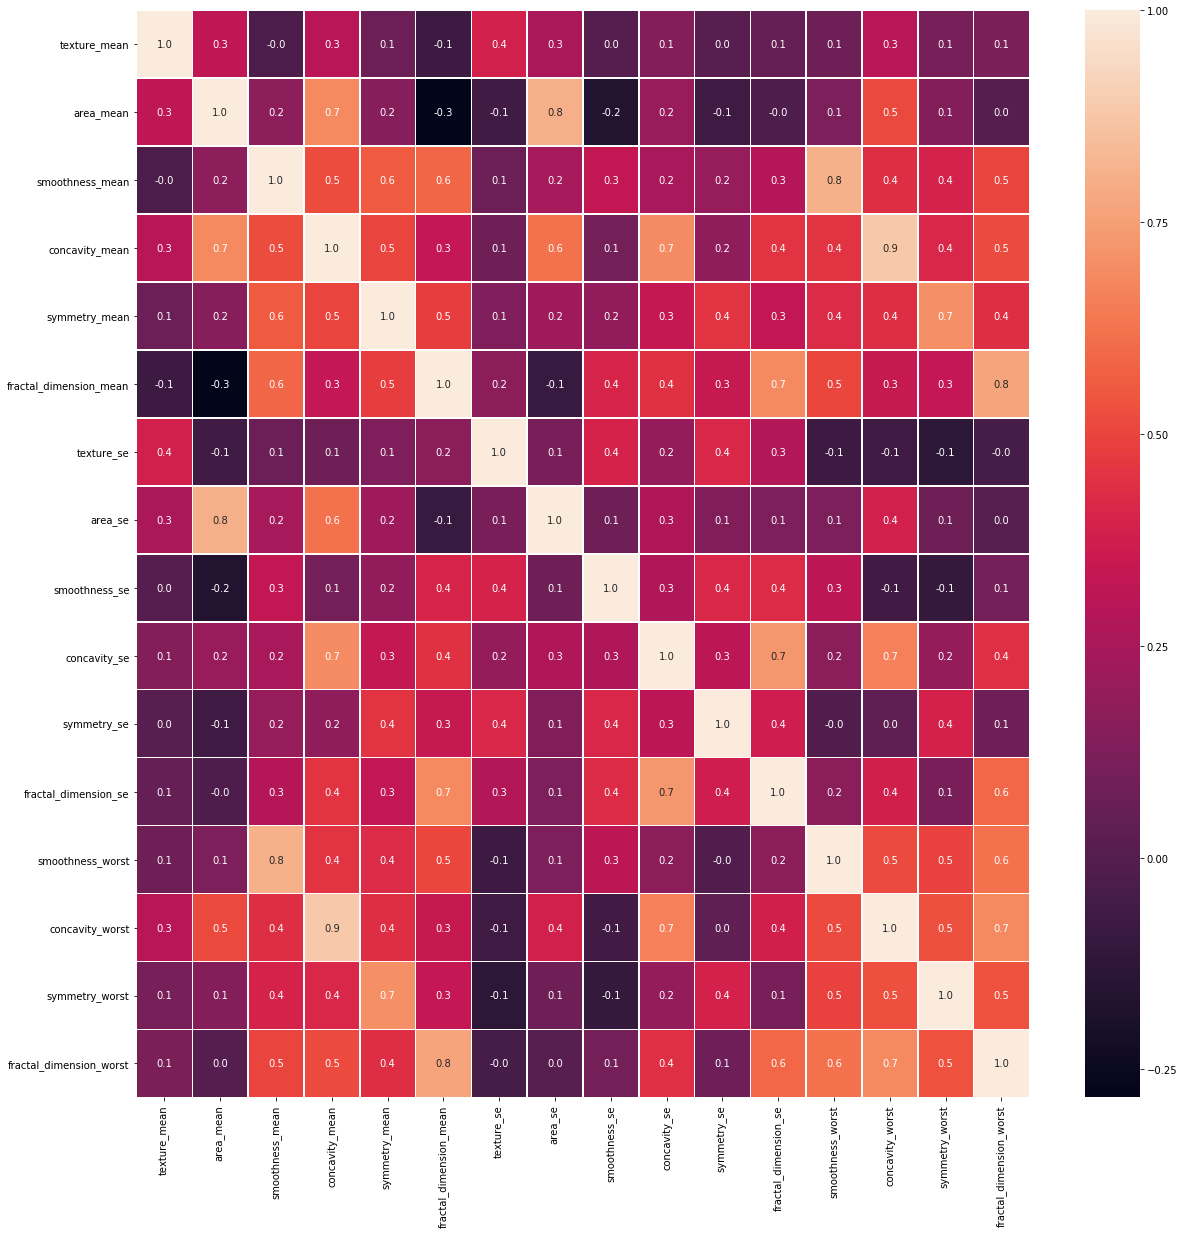

In [56]:
#checking if there are any features correlated using the heatmap.

#correlation map
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(features_reduced.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Accuracy is:  0.9532163742690059


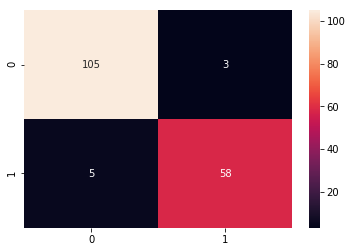

In [58]:
# importing randomforest classifier and necessary libraries for accuracy scores and confusion matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(features_reduced, labels, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
classifier = RandomForestClassifier(random_state=43)      
classifier = classifier.fit(x_train,y_train)

ac = accuracy_score(y_test,classifier.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,classifier.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")



More features can be reduced using different techniques and accuracy can be increased using cross validation techniques and finding the best k for the k-nn algorithm but that is not the scope of this project. Using the above visualisation techniques, important features can be identified. 